In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('pinger.log', 'r') as f:
    logf = f.readlines()

In [3]:
data_lines = [(logf[i-1], logf[i+1])
              for i, l in enumerate(logf)
              if l[:4] == 'PING']

In [4]:
def clean_delay(d):
    if d == '\n':
        return np.inf
    else:
        return float(d.split()[-2][5:])

data_lines = [(t[:-1], clean_delay(d)) for t, d in data_lines]

In [5]:
df = pd.DataFrame(data_lines, columns=['time', 'delay'])

In [6]:
number_of_bad_times = 0

for i, row in df.iterrows():
    temp = df['time'].iloc[i]
    try:
        pd.to_datetime(temp, dayfirst=True, format="%m/%d/%y-%H:%M:%S")
    except:
        number_of_bad_times += 1
        df.loc[i, 'time'] = pd.to_datetime(0)

print(f"Total bad-times: {number_of_bad_times}")

Total bad-times: 1


In [7]:
df['time'] = pd.to_datetime(df['time'], dayfirst=True, format="%m/%d/%y-%H:%M:%S")

In [8]:
df = df[df['time'] != pd.to_datetime(0)]

[Text(0.5, 1.0, 'Ping')]

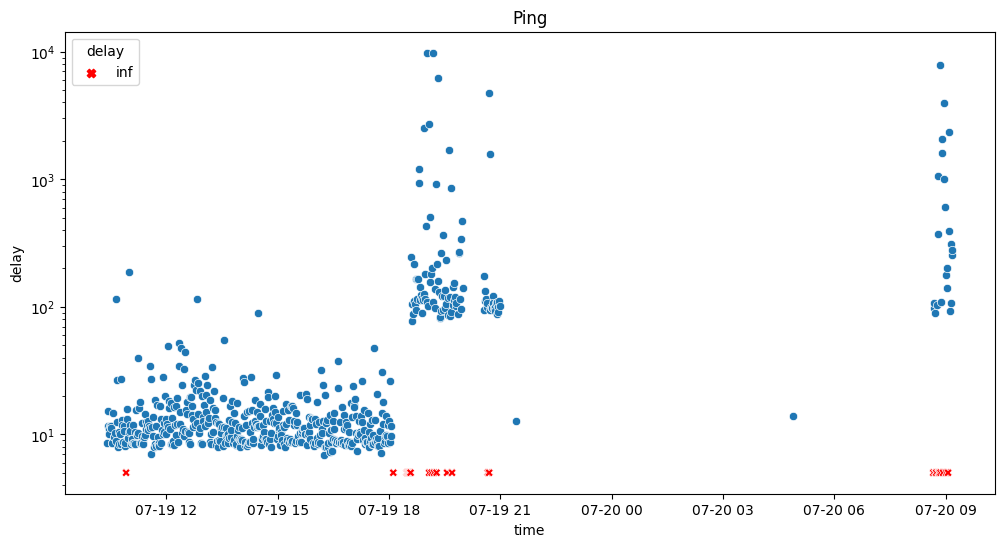

In [9]:
plt.figure(figsize=(12,6))
g = sns.scatterplot(data=df[df['delay'] != np.inf], x='time', y='delay')
sns.scatterplot(data=df[df['delay'] == np.inf], x='time', y=5, 
                style="delay", markers=['X'], hue='delay', palette=['red'], ax=g)
g.set(yscale='log')
g.set(title='Ping')

In [17]:
df['time_out'] = df['delay'] == np.inf

<BarContainer object of 2 artists>

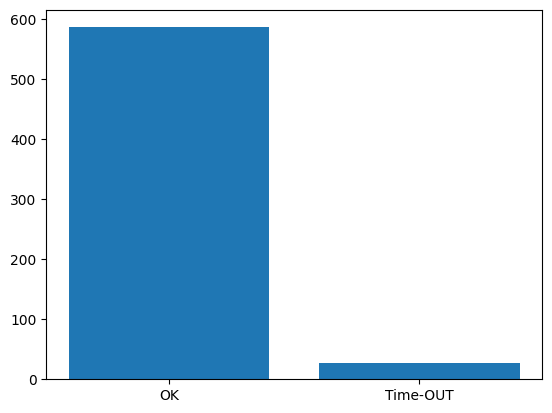

In [16]:
plt.bar(['OK', 'Time-OUT'], (df['delay'] == np.inf).value_counts().values)

<Axes: xlabel='delay', ylabel='Count'>

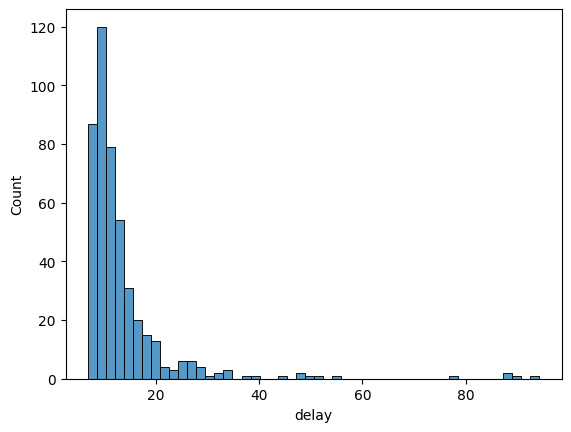

In [113]:
sns.histplot(data=df[df['delay'] < 100], x='delay', bins=50)

<Axes: ylabel='delay'>

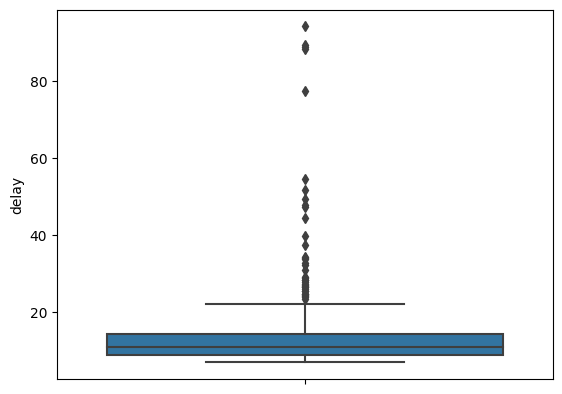

In [115]:
sns.boxplot(data=df[df['delay'] < 100], y='delay')

In [101]:
df[df['delay'] != np.inf].describe()

,time,delay
count,489,489.000000
mean,2023-07-19 14:30:46.642126848,55.284900
min,2023-07-19 10:24:01,6.915000
25%,2023-07-19 12:27:00,8.956000
50%,2023-07-19 14:29:00,11.315000
75%,2023-07-19 16:31:01,15.471000
max,2023-07-19 19:04:00,9822.275000
std,NaN,478.533403


In [108]:
xs = range(10000)
ys = [sum(df['delay'] < x) / len(df) for x in xs]

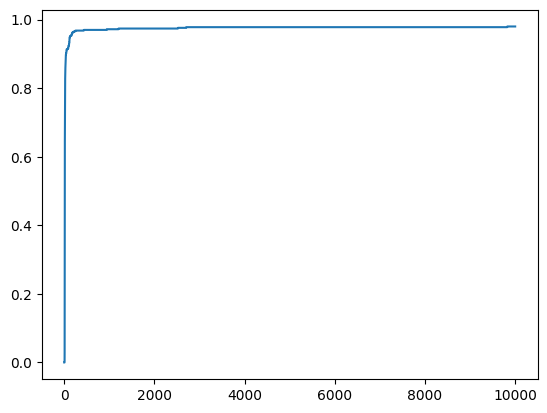

In [109]:
plt.plot(xs, ys)

In [111]:
ys[200]

0.9639278557114228